# DATA5710 - Applied Statistics for Complex Data
## Tutorial 5 - Dimension Reduction
## Part 2: Feature extraction


**Objectives:**

* To understand principal component analysis (PCA).
* To learn about applications of PCA. 
* To understand the concept of probabilistic PCA (PPCA) as a generative model.


**Instructions:**

* Exercises to be completed on IPython notebook such as: 
   * IPython 3 (Jupyter) notebook installed on your computer http://jupyter.org/install (you need to have Python installed first https://docs.python.org/3/using/index.html )
   * Web-based IPython notebooks such as Google Colaboratory https://colab.research.google.com/ 
   
* If you are using Jupyter intalled on your computer, Go to File->Open. Drag and drop "Week 5 - Part 2 - PCA.ipynb" file to the home interface and click upload. 
* If you are using Google Colaboratory, Click File->Upload notebook, and and upload "Week 5 - Part 2 - PCA.ipynb" file
* To run the cell you can press Ctrl-Enter or hit the Play button at the top.
* Complete all exercises marked with **TODO**.
* Save your file when you are done with the exercises, so you can show your tutor next week.

Lecturers: Lachlan Astfalck (content prepared by Gilad Francis and Sally Cripps)

## 1. Principal Component Analysis (PCA)

$\newcommand{\X}{\mathbf{X}}$

Principal component analysis (PCA) is an incredibly useful technique for visualising data and as a pre-processing step for machine learning algorithms like regression and clustering. Essentially it is a dimensionality reduction technique for data that of data such that it will capture the dimensions with the most variance. .

Alternatively, PCA can be thought of as a mechanism for de-correlating your data, i.e. it will find a projection of your data such that the covariance matrix of the projected data is *diagonal only*. Using this projected data can in some cases improve the speed and performance of other machine learning algorithms. The following description and exercises should give you a better intuition for that PCA is actually doing.

Let $X$ be our $N\times D$ design matrix, where $N$ is the number of observations and $D$ are the "features/dimensions". Features are observed variables or combinations thereof, and relate to a specific observation. 

If $X$ has zero mean, then we can construct the empirical covariance matrix $\mathbf{C}$ as:

$\mathbf{C} = X^\top X$

PCA attempts to find a new coordinate system such that the variance is maximised along the first axis or component. It turns out that this is equivalent to the eigen-decomposition of $\mathbf{C} = \mathbf{V}\mathbf{\Sigma}\mathbf{V}^\top$. Where $\mathbf{V}$ is a $D \times D$ matrix of where each column the new basis (or eigen-vector) and $\mathbf{\Sigma}$ is a diagonal matrix of eigenvalues. 

Each eigen-vector is associated with one eigenvalue, by choosing a subset of the eigenvectors (typically those associated with the largest eigenvalues), we can reduce the dimensionality of the feature vector by projecting it into this lower dimensional space.

In [1]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

(-2.4820494314037305,
 2.1242494430408603,
 -2.5153209135466725,
 2.203724464111563)

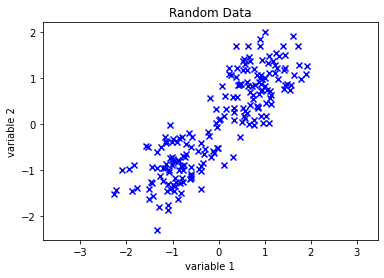

In [2]:
# Generate a 2-d dataset.
N = 100
cov1 = np.array([[6,3], [3,6]])
cov2 = np.array([[6,3], [3,6]])

data1 = np.random.multivariate_normal(np.array([4, 4]), cov1, N)
data2 = np.random.multivariate_normal(np.array([-4, -4]), cov2, N)
data = np.vstack([data1, data2]) #Concatanate

# We need to 'center' the data, by subtracting the mean of each column.
X = data - data.mean(axis=0)
scale = X.std(axis=0)
X = X/scale  #Check effect of scale 
pl.scatter(X[:,0], X[:,1], marker='x', color='b')
pl.title('Random Data'); pl.xlabel('variable 1'); pl.ylabel('variable 2')
pl.axis('equal')

In [3]:
# Calculate C=X'X
C = X.T.dot(X)
print(C)

[[200.         172.05064512]
 [172.05064512 200.        ]]


In [4]:
# Perform Eigen decomposition
sigma, V = np.linalg.eig(C) #Eig values, Eig vectors
Sigma = np.diag(sigma) #Put Eig values into a diagonal array
print('Sigma=\n',Sigma)
print('V=\n',V)

Sigma=
 [[372.05064512   0.        ]
 [  0.          27.94935488]]
V=
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [5]:
# Verify if V'SV == C
V.dot(Sigma.dot(V.T))

array([[200.        , 172.05064512],
       [172.05064512, 200.        ]])

Note that the `eig` function does not return ordered eigenvalues, thus we must inspect the eigenvalues to know which eigenvector is the principal component.

In [6]:
print('Eigenvalues are: {}'.format(sigma))
max_eigen_index = np.argsort(sigma)[-1] # np.argsort orders in ascending order, [-1] indexes the final element of the list
min_eigen_index = np.argsort(sigma)[0]
print('The largest eigenvalue is at index : {}'.format(max_eigen_index))

Eigenvalues are: [372.05064512  27.94935488]
The largest eigenvalue is at index : 0


Plot the data, use `pl.arrow` to draw the arrows of the eigenvalues. Transform the data and plot it using the eigenvectors as the principal axes. You can transform the data by:
$\mathbf{X}_p = \mathbf{X}\mathbf{V^\top}$, where $\mathbf{V}$ is the matrix of eigen-vectors.

Text(0, 0.5, 'variable 2')

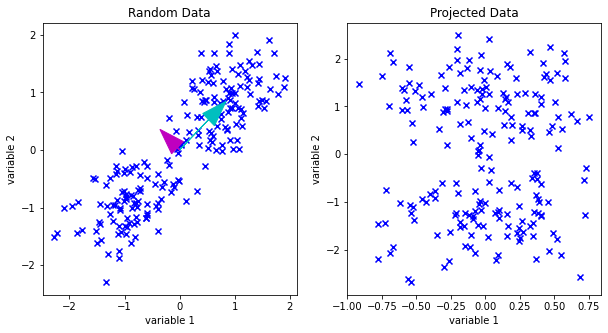

In [7]:
pl.figure(figsize=(10, 5))
g = 20e-4 #scaling factor for arrow

pl.subplot(121)
pl.scatter(X[:,0], X[:,1], marker='x', color='b')
pl.title('Random Data'); pl.xlabel('variable 1'); pl.ylabel('variable 2')
#pl.axis([-20, 20, -20, 20])
pl.arrow(0, 0, (g*sigma[0])*V[0,0], (g*sigma[0])*V[1,0] , color='c', head_width=0.3) #tail_x, tail_y, head_x, head_y
pl.arrow(0, 0, (g*sigma[1])*V[0,1], (g*sigma[1])*V[1,1] , color='m', head_width=0.3)

pl.subplot(122)
Xp = X.dot(V.T)
pl.scatter(Xp[:,0], Xp[:,1], marker='x', color='b')
pl.title('Projected Data'); pl.xlabel('variable 1'); pl.ylabel('variable 2')
#pl.axis([-20, 20, -20, 20])

Let $\hat{\mathbf{V}}$ be a $D \times K$ matrix of eigenvectors where only $K$ of the $D$ columns associated with the largest eigenvalues have been chosen. We can project the data onto the new space to from $\hat{\X}$ as follows:

$\hat{\X} = \X\hat{\mathbf{V}}$

$\hat{\X}$ is an approximation of $\X$ with shape $N \times K$. 

**Exercise:** Approximate the original pattern using only the first component.

In [8]:
V[:, max_eigen_index]

array([0.70710678, 0.70710678])

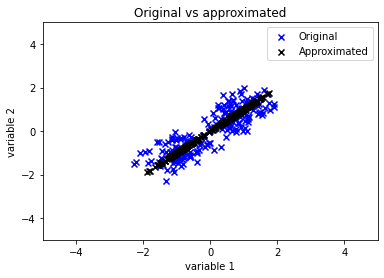

In [9]:
first_component = np.zeros((2,2))
first_component[:,max_eigen_index] = V[:,max_eigen_index] 

projected = X @ first_component @ first_component.T


pl.scatter(X[:,0], X[:,1], marker='x', color='b', label='Original')
pl.scatter(projected[:,0], projected[:,1], marker='x', color='k', label='Approximated')
pl.title('Original vs approximated'); pl.xlabel('variable 1'); pl.ylabel('variable 2')
pl.axis([-5, 5, -5, 5]); pl.legend()

**excerise**: Check the effect of scale on performance of PCA. Do we need to standartize data before running PCA?

## 2. Applications of PCA

Download the NSW rock dataset from https://ecat.ga.gov.au/geonetwork/srv/eng/catalog.search#/metadata/65464 and upload to your ipython home folder (use tk UI below). Perform PCA on the given face dataset and identify the 2 (or more?) principal components that mostly explain the variance. Plot the spatial vriation of the different components (amplitude of component vs coordinates). 


In [10]:
#Select the rock chemistry data -
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline
import pandas as ps
from tkinter import Tk     # from tkinter import Tk for Python 3.x
from tkinter.filedialog import askopenfilename

#NOTE: tk often opens the dialouge in the background, so check other windows.

Tk().withdraw() #
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/home/arpitk/data/Work/PhD/DARE-PhD/tutorials/DATA-6811/topic-6/Geochemistry_NSW_11_10_2007.csv


In [11]:
#Open CSV file - check the CSV file - We will use on the columns containing  details about the chemistry of the rocks 
#Data must be preprocessed - treat missing values etc.

df = ps.read_csv(filename)

#Remove entries without coordinates:
df.dropna(subset = ['easting', 'northing'],inplace=True)

#Consider: fill empty cell with zeros
#df.fillna(0, inplace=True)

In [12]:
#Rock composition
Xr = df.iloc[:, 33:] #Rock chemistry columns
Xn = Xr - Xr.mean(axis=0)
Xn = Xn/Xn.std(axis=0)  #This is a simple standartization. Should consider something else to deal with outliers etc
Xn.fillna(0, inplace=True)  #Replace any NaN due to std
print(f"Number of sites: {Xn.shape[0]}")
print(f"Number of minerals: {Xn.shape[1]}")

Number of sites: 8377
Number of minerals: 80


In [13]:
#TODO: find eigenvalues and eigenvectors

Cn = Xn.T.dot(Xn)
sigma, V = np.linalg.eig(Cn) 

print('sigma=\n',sigma)
print('V=\n',V)


sigma=
 [3.68930754e+04 1.89622750e+04 1.38698733e+04 1.13981500e+04
 1.00195093e+04 8.47326990e+03 8.03215568e+03 7.49521176e+03
 7.34029439e+03 7.03784549e+03 5.71064031e+03 5.60719184e+03
 4.83165492e+03 4.70969488e+03 4.45499406e+03 4.33486818e+03
 4.00635612e+03 3.83009024e+03 3.72923415e+03 3.62786092e+03
 3.39381207e+03 3.30452863e+03 3.21947144e+03 2.99655329e+03
 2.79781961e+03 2.71384506e+03 2.57194963e+03 2.28534370e+03
 2.14330028e+03 2.10708679e+03 2.00366056e+03 1.94231491e+03
 2.50603908e+01 1.25265222e+01 1.38122548e+01 5.82471157e+01
 1.70974515e+02 1.78036816e+02 2.01213351e+02 2.39620435e+02
 2.52454658e+02 2.95895053e+02 3.32368117e+02 3.48964290e+02
 4.49484587e+02 5.35228886e+02 5.40532895e+02 5.79424566e+02
 5.85779710e+02 6.25577750e+02 6.90646007e+02 7.34127122e+02
 1.77299608e+03 1.72274291e+03 8.25257921e+02 8.51713775e+02
 9.03933109e+02 1.68051610e+03 1.62457294e+03 1.01066653e+03
 1.06352828e+03 1.10700181e+03 1.14641145e+03 1.14174034e+03
 1.51738754e+03 

In [14]:
max_eigen_index = np.argsort(sigma)[-1] # np.argsort orders in ascending order, [-1] indexes the final element of the list
min_eigen_index = np.argsort(sigma)[0]
print('The largest eigenvalue is at index : {}'.format(max_eigen_index))
print('Variance explained of largest eigenvalue : {}'.format(sigma[max_eigen_index]/sum(sigma)))

The largest eigenvalue is at index : 0
Variance explained of largest eigenvalue : 0.15363216900689006


Text(0, 0.5, 'Eigenvalue')

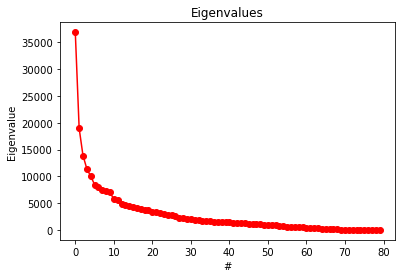

In [15]:
sorted_sigma = sigma[np.argsort(sigma)]
pl.plot(np.flipud(sorted_sigma),'ro-')
pl.title('Eigenvalues'); pl.xlabel('#'); pl.ylabel('Eigenvalue')


Text(0, 0.5, '% variance explained')

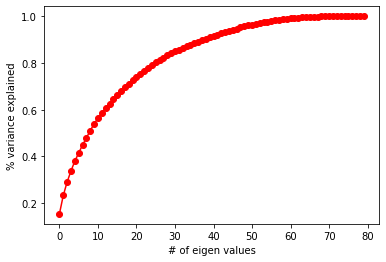

In [16]:
#TODO: Plot the variance captured by eigenvectors as a function of the number of eigenvalues
pl.plot(np.cumsum(np.flipud(sorted_sigma))/np.sum(sorted_sigma), 'ro-')
pl.xlabel('# of eigen values')
pl.ylabel('% variance explained')

**TODO: Visulaize components**

Find w1 and w2, the first two components for every site and visualize on a 2D scatter plot (components vs. the coordinate of the site).

Plot w1 vs w2 - what can you tell about the data?


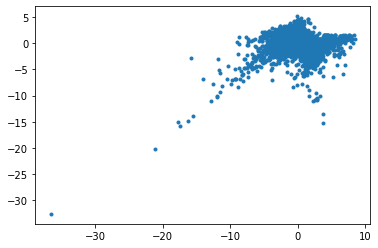

In [19]:
u1 = V[:,max_eigen_index]
u2 = V[:,np.argsort(sigma)[-2]]
#TODO: find the corresponding projection of each data point (site)
w1 = Xn @ u1
w2 = Xn @ u2
pl.plot(w1,w2,'.')


4.197185538872893


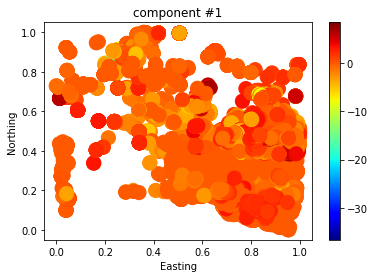

In [22]:
#Organizing coordination and ploting components #1
easting = (df['easting']- df['easting'].min())/(df['easting'].max()- df['easting'].min())
northing = (df['northing']- df['northing'].min())/(df['northing'].max()- df['northing'].min())

pl.scatter(easting, northing, s=200, c=w1, cmap='jet')
pl.title('component #1')
pl.xlabel('Easting')
pl.ylabel('Northing')
pl.colorbar()

print(np.mean(w1)+2*np.std(w1))


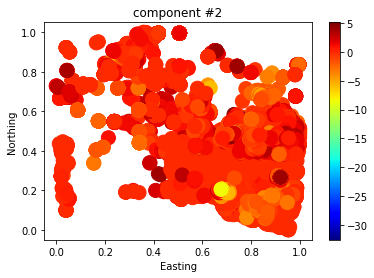

In [24]:
pl.scatter(easting, northing, s=200, c=w2, cmap='jet')
pl.title('component #2')
pl.xlabel('Easting')
pl.ylabel('Northing')
pl.colorbar()
